In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [ ]:
# Load Data Viz Pkgs
import seaborn as sns

In [ ]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [ ]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [ ]:
# Load Dataset
df = pd.read_csv("emotion_dataset_2.csv")


In [ ]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [ ]:
df['Emotion'].value_counts

<bound method IndexOpsMixin.value_counts of 0        neutral
1            joy
2        sadness
3            joy
4            joy
          ...   
20643        joy
20644       fear
20645        joy
20646       fear
20647       fear
Name: Emotion, Length: 20648, dtype: object>

In [ ]:
#value counts
df['Emotion'].value_counts()

joy         6569
sadness     3914
fear        3211
anger       2585
surprise    2422
neutral     1331
disgust      527
shame         89
Name: Emotion, dtype: int64

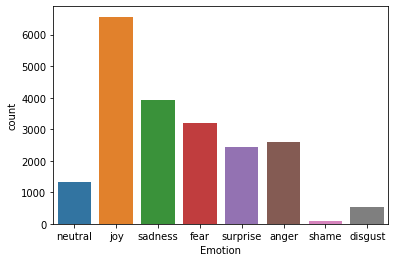

In [ ]:
# Plot
sns.countplot(x='Emotion',data=df)

In [ ]:
#Cleaning data using neattext(nfx)
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
# To remove Userhandles of twitter from the dataset
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [ ]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,?
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
20643,20643,joy,a 2 hour #depressed bus journey :'(,2 hour #depressed bus journey :'(
20644,20644,fear,@jharrison9292 The only thing that scares Chuc...,thing scares Chuck Norris James Harrison
20645,20645,joy,O.o last night I dreamed about George. Can't w...,O.o night dreamed George. Can't wait Xmas.
20646,20646,fear,so my foots asleep and i am deathly scared a r...,foots asleep deathly scared random lighter gon...


In [ ]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [ ]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42) 

In [ ]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [ ]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
# Check Accuracy
pipe_lr.score(x_test,y_test)


0.5987086359967716

In [ ]:
# Make A Prediction
ex1 = "She is very kind."


In [ ]:
pipe_lr.predict([ex1])


array(['joy'], dtype=object)

In [ ]:
#Predicition prob
pipe_lr.predict_proba([ex1])


array([[0.05095028, 0.02532378, 0.03151092, 0.41482103, 0.14120486,
        0.24459025, 0.00335634, 0.08824255]])

In [ ]:
# To Know the classes
#All the classes present
pipe_lr.classes_


array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [ ]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_11_december_2022.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()
